In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

In [57]:
churn = pd.read_csv('https://github.com/ApostalEVGEN/School_SkillFactory/blob/main/churn.csv', sep=',')
display(churn.head())

ParserError: Error tokenizing data. C error: Expected 1 fields in line 28, saw 367


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<AxesSubplot:>

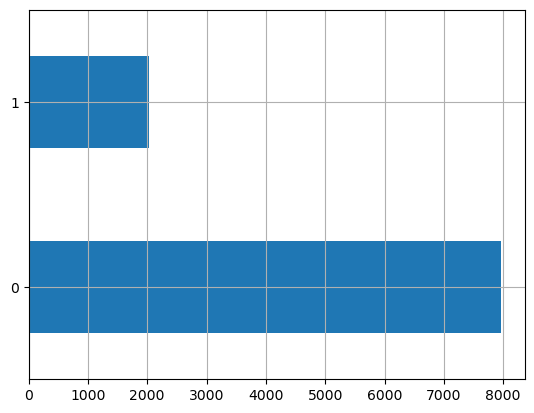

In [4]:
clients = churn['Exited'].value_counts()
churn["Exited"].value_counts().plot.barh(rot=0, grid=True)

9.1 Из представленного графика в котором за значение 0 - взяты лояльные клиенты банка,
а за 1 - ушедшие клиенты
Почти 80% остаются клиентами банка, это клиенты которых устраивают продукты предоставляемые банком, отсюда выходит что условия банка среднестатистические по количеству оттока клиентов

In [17]:
histogram_data = churn[churn['Balance']>2500]
fig = px.histogram(
    data_frame = histogram_data,
    x = 'Balance',
    height=600,
    width=900,
    title='Распределение баланса на счетах в банке свыше 2500$',
)
fig.show()

bar_data = churn.groupby([churn['Balance']>2500], as_index=False).mean()
px.bar(
    data_frame=bar_data,
    x='Balance',
    y='Exited',
    height=300,
    width=700,
    title='Распределение баланса на счетах в банке свыше 2500$'
)

C:\Users\ievge\AppData\Local\Temp\ipykernel_9268\2232472538.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



9.2 На представленной гистограмме и столбчатом графике видно распределение на счетах в банке. Большинство клиентов банка держат на своем счете суммы свыше 75000$ и эти клиенты скорее всего являются лояльными клиентами а также пользуются услугами предоставляемыми банком в полном объеме.

In [6]:
fig = px.histogram(
    data_frame=churn, 
    x='Balance',
    color='Exited',
    height=600,
    width=800,
    histfunc='count',
    title='Распределение баланса клиентов: 1 - ушедших, 0 - лояльных', 
    nbins = 25
)
fig.show()

9.3 Как представлено на диаграмме распределение баланса ушедших клиентом значительно меньше, чем лояльных. Также у ушедших клиентов распределение ниже так как всегда есть определенный процент недовольных клиетов, либо клиентов у которых есть необходимость перехода на обслуживание в другой банк, также возможно что ушедшие клиенты просто используют депозитный счет для хранения средств и не пользуются банковскими продуктами

In [13]:
fig = px.box(data_frame=churn, x='Age', color='Exited')
fig.show()

9.4 Медиана у лояльных и ушедших клиентов примерно одинаковая, но лояльные клиенты гораздо активнее пользуются средствами о чем говорит ширина ящика. Так же можно с уверенностью сделать вывод, что речь идет о кредитных картах. Нет отрицательных выбросов, что говорит о том что ни у кого из клиентов нет проблем. Границы ящика у лояльных и ушедших клиентов примерно одинаковая(думаю связано со стандартными кредитными лимитами банков) у лояльных клиентов совпадают минимум и 25 Квартиль.Также у ушедших клиентов возраст в основном до 57 лет, а у дояльных до 71. Из этого можно сделать вывод о том что банку следует обращать внимание на аудиторию клиентов которые укладываются в границы ящика лояльных клиентов(от 38 до 51 целевая аудитория)

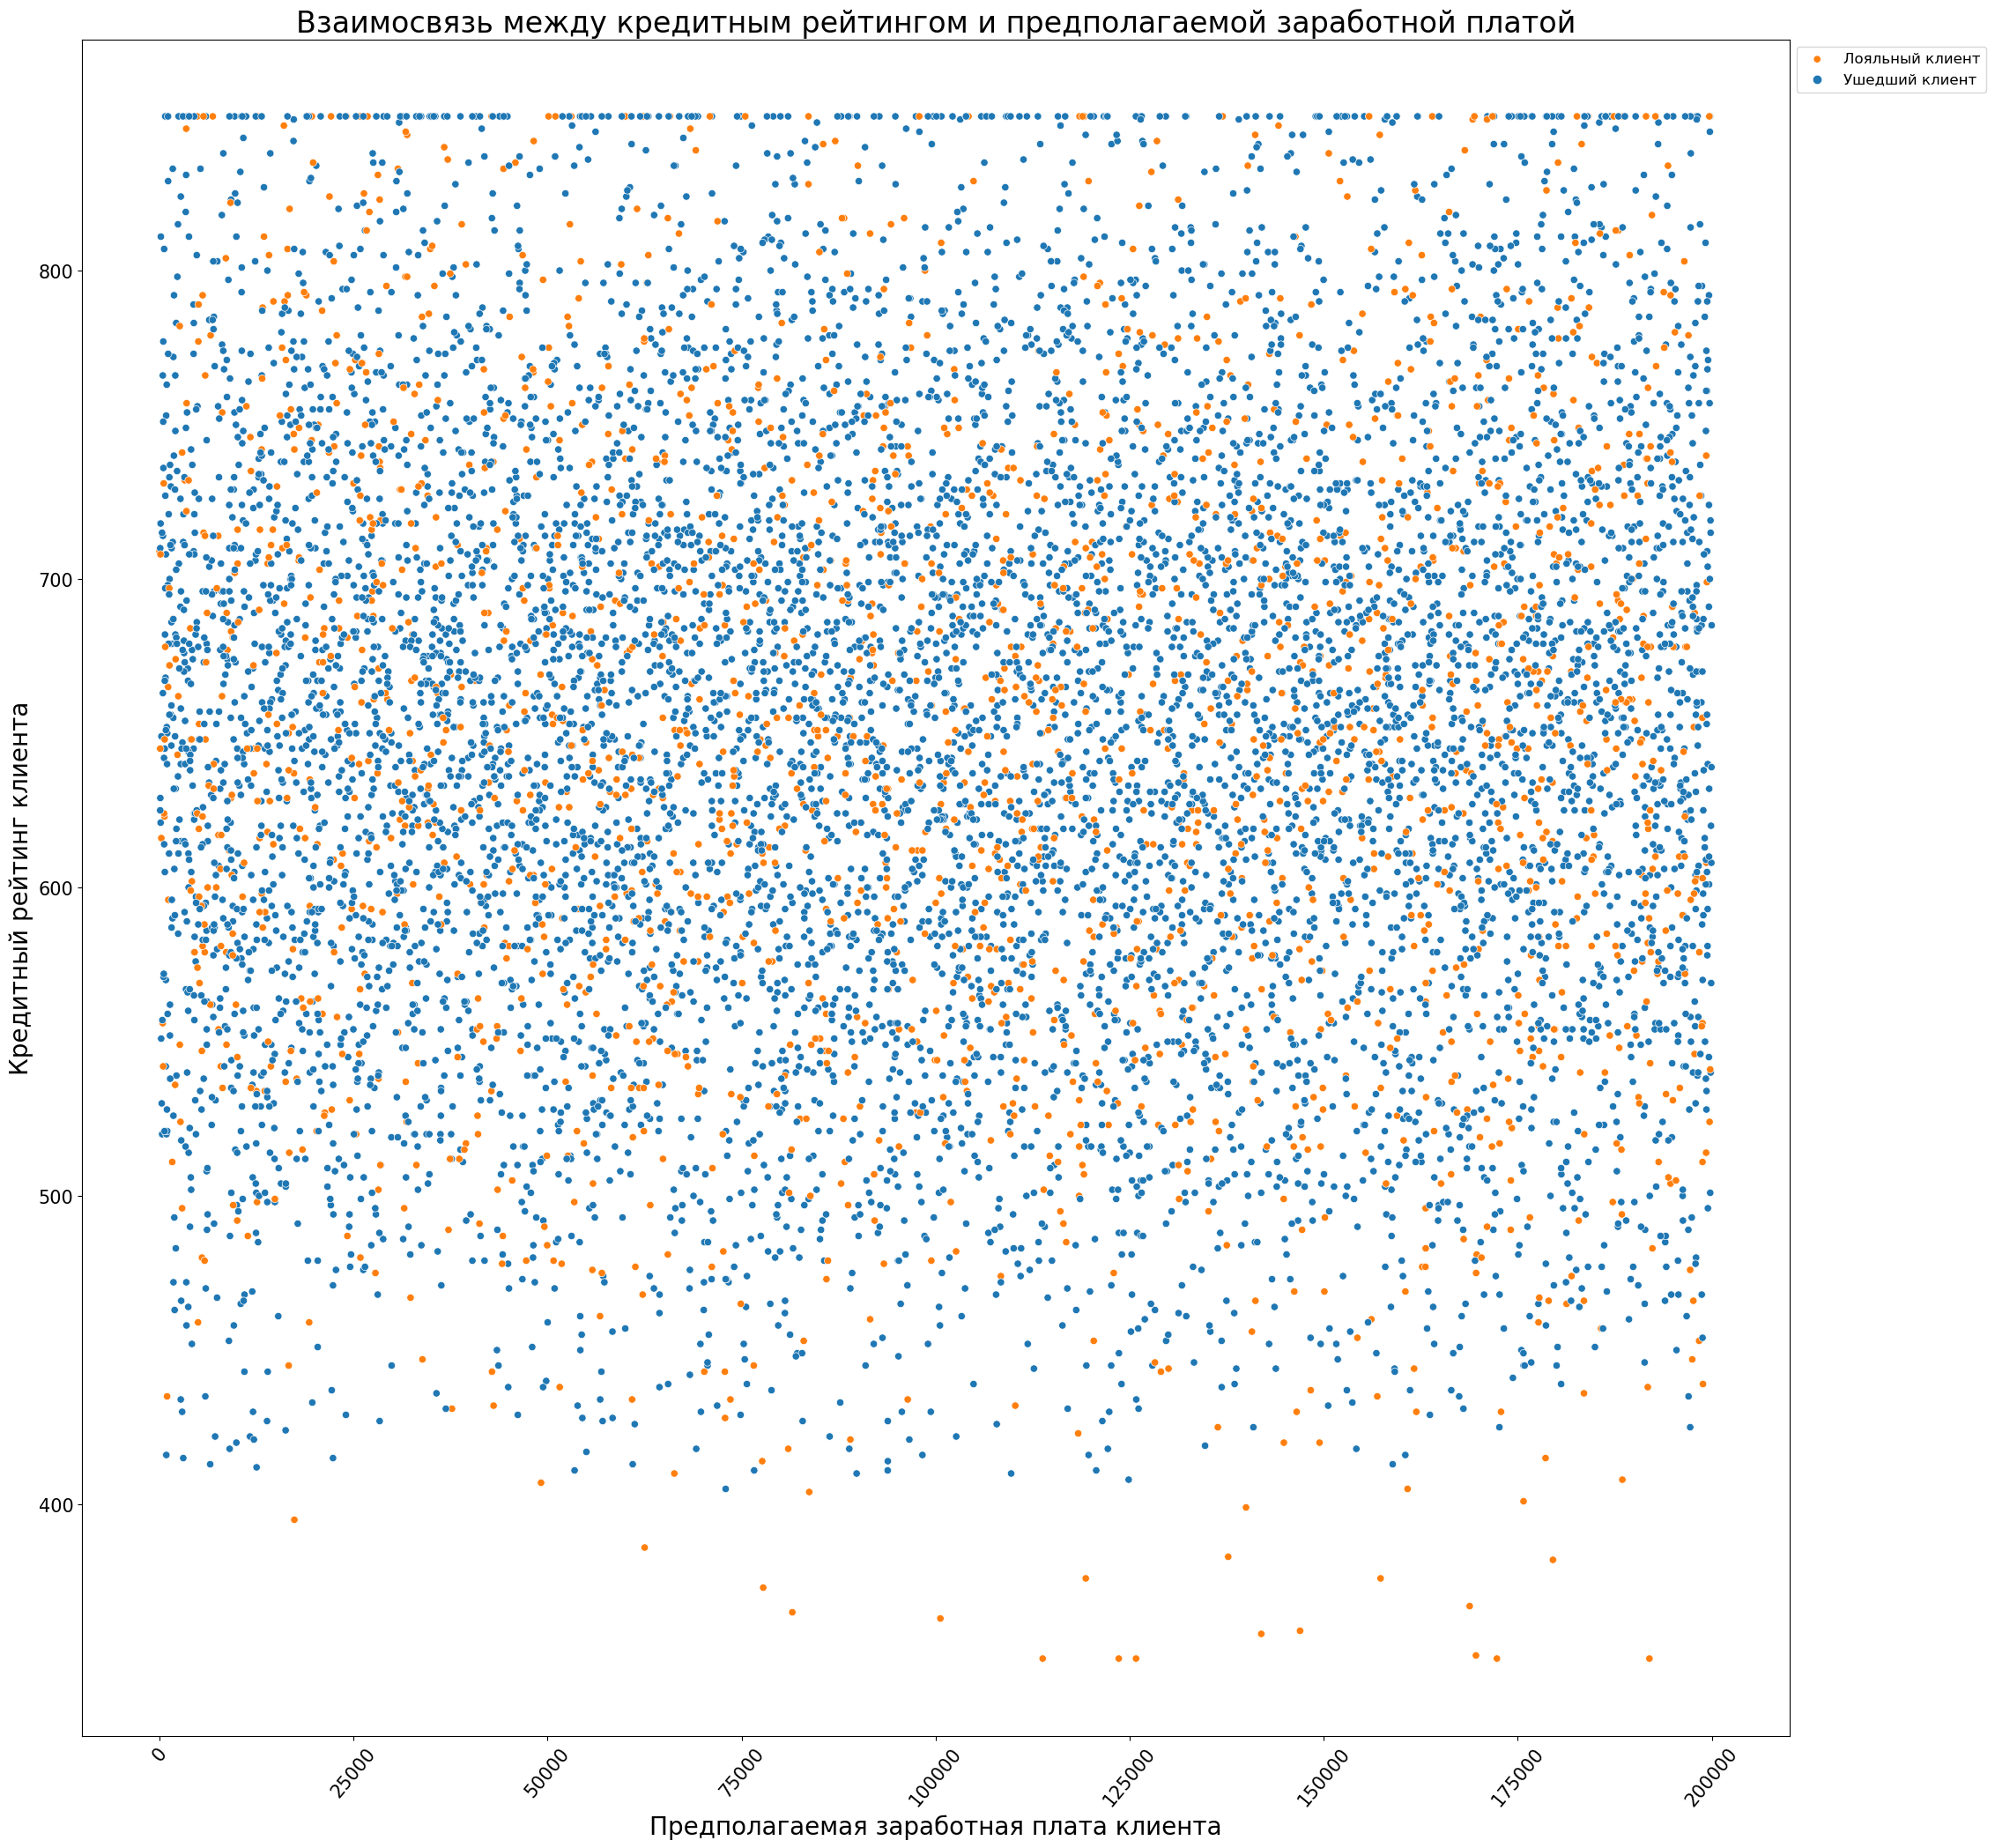

In [25]:
fig, axes = plt.subplots(figsize=(25,25))
sns.scatterplot(
    data=churn,
    y='CreditScore',
    x='EstimatedSalary',
    hue='Exited'
);

axes.set_title('Взаимосвязь между кредитным рейтингом и предполагаемой заработной платой', fontsize=24)
axes.set_ylabel('Кредитный рейтинг клиента',fontsize=20)
axes.set_xlabel('Предполагаемая заработная плата клиента', fontsize=20)

axes.legend(labels = ['Лояльный клиент','Ушедший клиент'],loc = 2, fontsize =12, bbox_to_anchor=(1, 1));
axes.tick_params(axis= 'y', labelsize=15)
axes.tick_params(axis='x', labelsize=15, rotation = 50)


9.5 Из приведенной пузырьковой диаграммы видно, что ушедшие клиенты чаще лояльных пользовались кредитами и кредитный рейтинг у них выше. Возможно они уходили так как их не устраивали кредитные обязательства, но по оси абсцисс(предполагаемая заработная плата) большая часть ушедших клиентов имеет проедполагаемую заработную плату <100000. Также следует обратить внимание на выдачу кредитов клиентам с зарплатой 0.

In [12]:
bar_data = churn.groupby(['Gender'], as_index=False).mean()
px.bar(
    data_frame=bar_data,
    x='Gender',
    y='Exited',
    height=300,
    width=700,
    title='Соотношение ушедших мужчин и женщин'
)

C:\Users\ievge\AppData\Local\Temp\ipykernel_9268\1828118878.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



9.6 Из представленной диаграммы видно что в клиентом мужского пола больше чем женского. Скорее всего это связано с тем, что мужчины распределяют бюджет семьи и они лучше могут управлять капиталом. Клиенты женского пола по моему мнению это скорее либо одинокие женщины либо buisness-woman. 

In [31]:
bar_data = churn.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='RowNumber',
    color='Exited',
    barmode='group',
    height=400,
    width=800,
    title='Соотношение ушедших и лояльных клиентов в зависимости от числа услуг'
)
fig.show()

9.7 Из представленной тепловой карты четко видно, что ушедшие клиенты меньше пользовались продуктами банка, возможно они не были уверены, что смогут выплатить кредит либо другие услуги которые банк предоставляет за отдельную плату

In [10]:
bar_data = churn[churn['Exited'] == 1].groupby(['IsActiveMember'], as_index=False)[['Exited']].count()
fig = px.histogram(
    data_frame=bar_data,
    x='IsActiveMember',
    y='Exited',
    color='IsActiveMember',
    height=300,
    width=700,
    title='Отток клиентов в зависимости от статуса участника'
)
fig.update_layout(yaxis_title="Количество клиентов")
fig.update_xaxes(type='category')
fig.show()

9.8 Из представленной диаграммы видно что пловина клиентов является неактивной и если клиенту будет неудобно пользоваться услугами банка, то он может выбрать другой. Для сохранения количества клиентов из неактивной группы, банку следует заинтересовать клиентов определенными видами услуг. Например: сниженные проценты по кредитным продуктам, увеличение процента по вкладам, какие-либо гибкие системы скидок на услуги банка в зависимости от возможности клиента, предложения банка и скидки у партнеров банка(магазины, автозаправки, медицинские услуги и т.д.)

In [43]:
fig = px.choropleth(
    data_frame=churn,
    locations=churn.index,
    locationmode = "country names", 
    color="Exited", 
    title='Распределение доли ушедших клиентов по странам', 
    width=800, 
    height=500,
    range_color=[0, 0.5], # так как максимальное значение 0.32
    color_continuous_scale='YlGnBu' 
)
fig.show()

9.9 

NameError: name 'pivot_9' is not defined

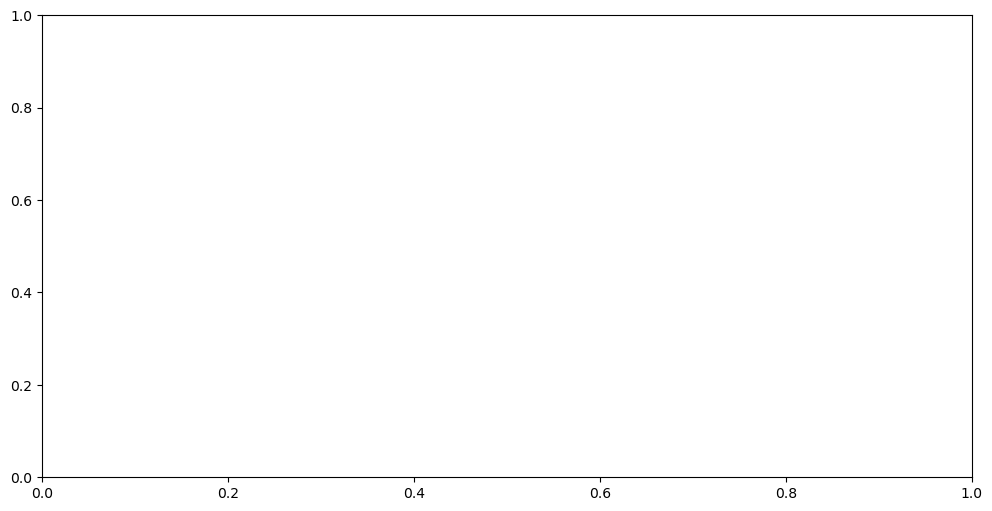

In [56]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)
fig_9, axes_9 = plt.subplots(figsize=(12, 6))
heatmap = sns.heatmap(data=pivot_9, ax=axes_9, cmap='YlGnBu')
heatmap.set_title('Тепловая карта распределения среднего значения оттока клиентов');
heatmap.set_ylabel('Категориальный признак рейтинга')
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка');

9.10